**【問題1】コンペティション内容の把握**  
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。  
Home Creditはどのような企業？  
このコンペティションでは何を予測する？  
それを予測することで企業が得られるメリットは何？

**Home Creditはどのような企業？**  
融資を行う金融機関。様々なバックグランドを持っている顧客に貸し付けを行えるように
顧客ごとに様々なデータを収集して、機械学習手法を用いて、顧客の返却能力を評価して、それに応じて貸し付けを判断する。

**このコンペティションでは何を予測する？**  
顧客がお金を返済できる確率

**それを予測することで企業が得られるメリットは何？**  
機械学習にて評価することによって、返却能力のある顧客に対してもれがないようにする

**【問題2】データの概観の把握**  
データの概観を把握するために以下のようなことを行ってください。  
- .head()、.info()、describe()などを使う  
- 欠損値の有無を見る  
- クラスごとのデータ数をグラフに出す  
それぞれ結果に対する説明や考察も行ってください。

In [1]:
import pandas as pd
df = pd.read_csv('application_train.csv')

In [2]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
pd.set_option('display.max_row', 120)
df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
                                ...  
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
HOUR_APPR_PROCESS_START             0
SK_ID_CURR                          0
Length: 122, dtype: int64

In [6]:
df['TARGET'].unique()

array([1, 0], dtype=int64)

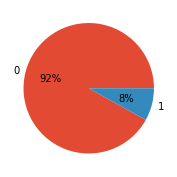

In [7]:
# クラスごとのデータ数をグラフに出す
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

labels = ['0', '1']
sizes = df['TARGET'].value_counts()
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)

ax.pie(sizes, labels=labels, autopct='%1.0f%%')
plt.show()

**【問題3】課題設定**  
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

# 疑問
- 欠損値を含む特徴量の数
- 目的変数について相関係数が高い特徴量
- 目的変数と性別(CODE_GENDER)の関係
- 目的変数と収入(AMT_INCOME_TOTAL)の関係
- 目的変数と収入タイプ(NAME_INCOME_TYPE)の関係

# 課題
- 相関係数を調べて、相関が高い特徴量を調べる

**【問題4】データ探索**  
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。  

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [8]:
# 欠損値を含む特徴量の数
len(df.isnull().sum()[df.isnull().sum() > 0])

67

121の特徴量のうち67の特徴量に少なくとも1つの欠損値がある

In [9]:
corr_mat1 = df.corr(method='pearson')

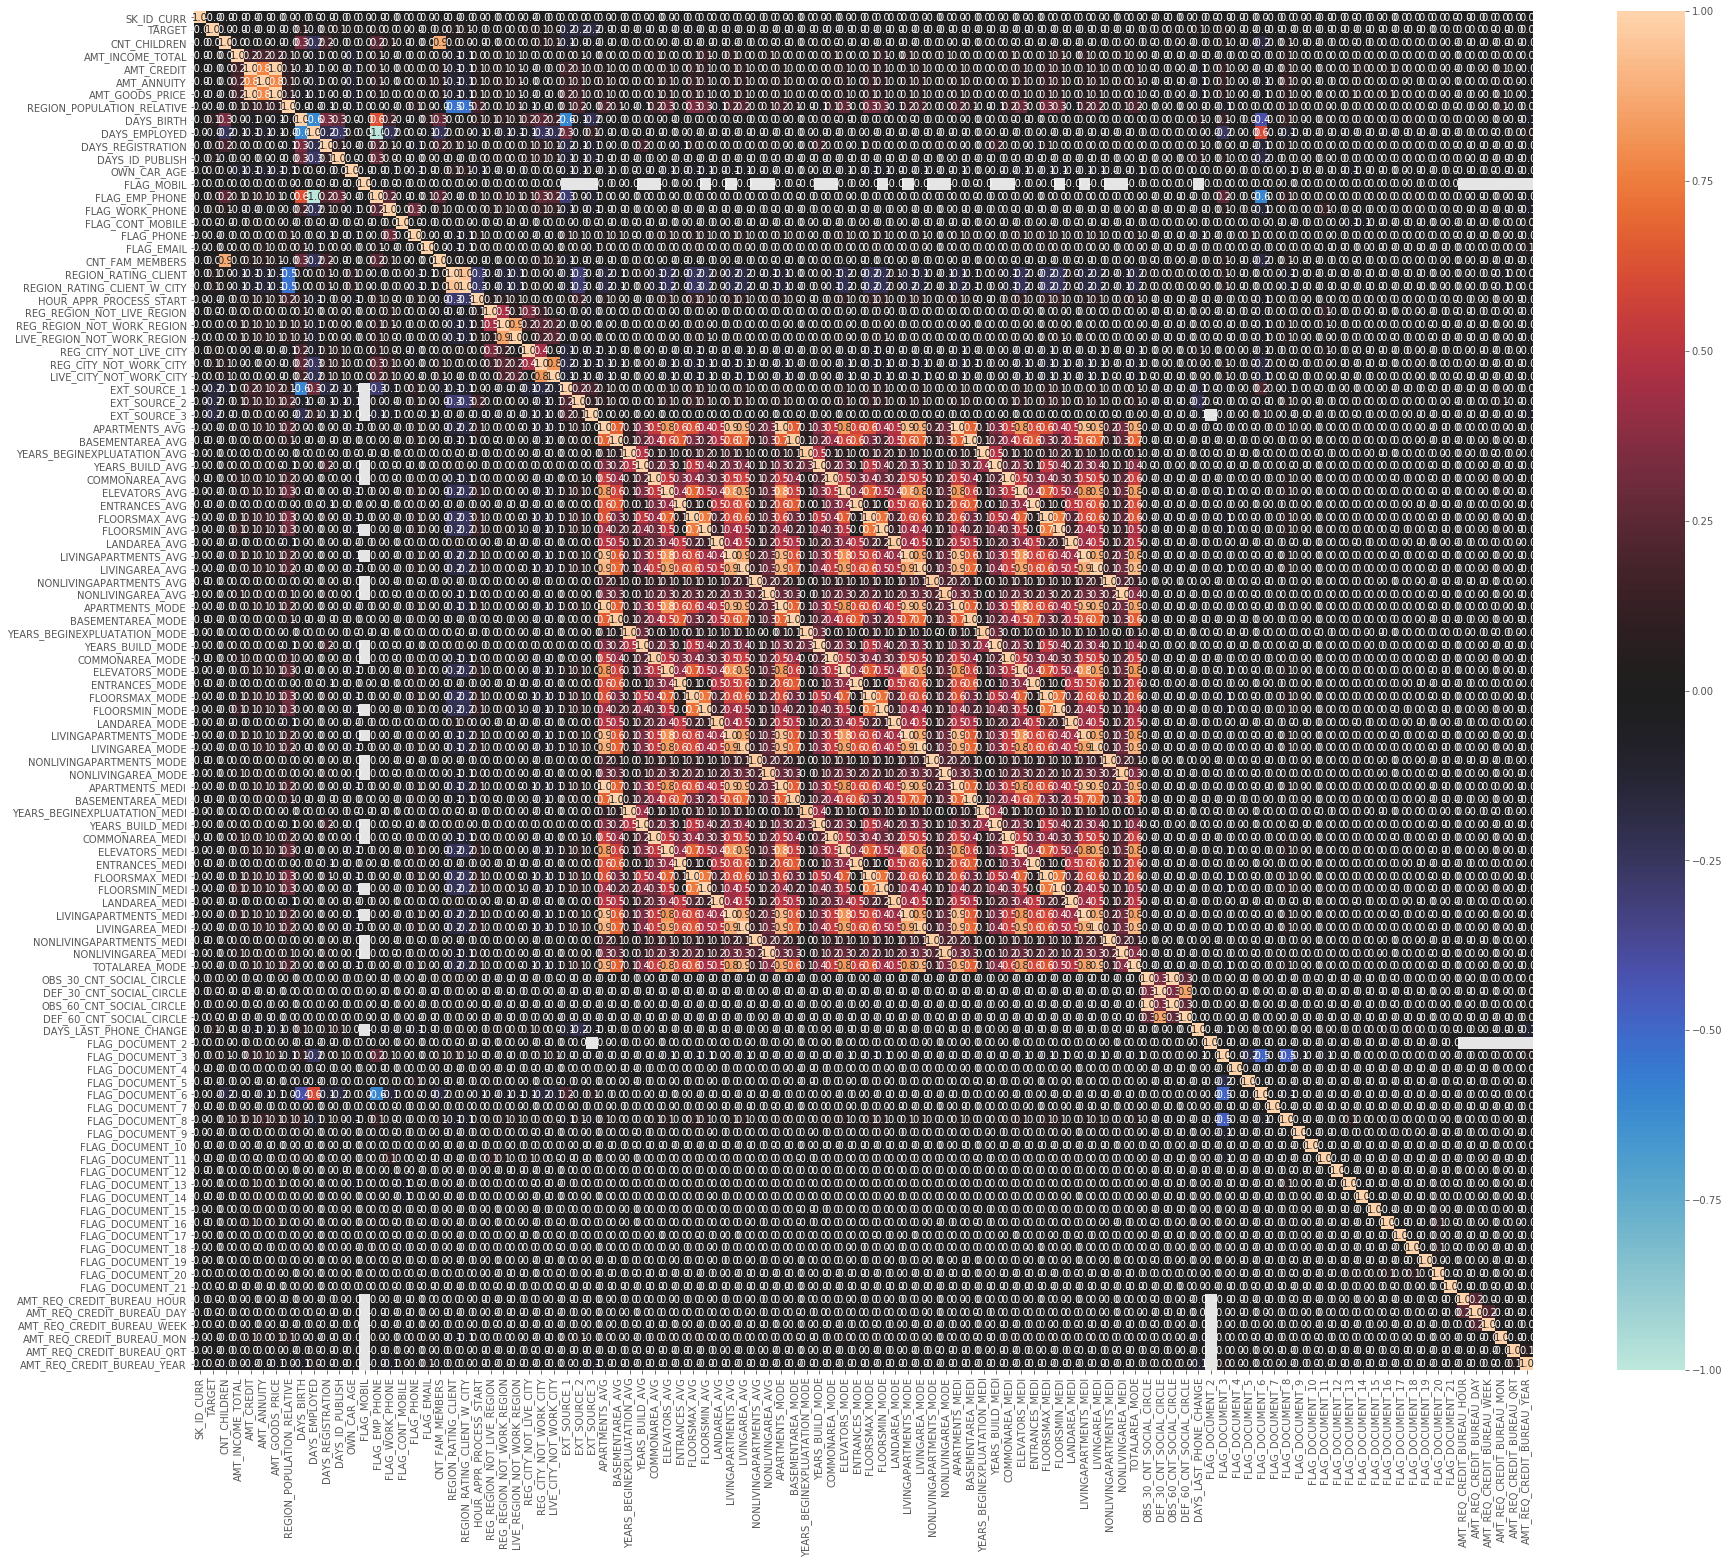

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける
fig = plt.figure(figsize=(30,25))

sns.heatmap(corr_mat1,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat1.columns.values,
            yticklabels=corr_mat1.columns.values
           )
plt.show()

In [11]:
import numpy as np
# 目的変数について相関係数が高い特徴量を昇順で10個抽出
abs_corr_mat_SalePrice = np.fabs(corr_mat1['TARGET']).drop('TARGET')
corr_mat_SalePrice_top10_index = abs_corr_mat_SalePrice.nlargest(10)
corr_mat_SalePrice_top10_index

EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
Name: TARGET, dtype: float64

目的変数TARGETに対して一番高い相関係数をもつ特徴量EXT_SOURCE_3でも約0.18しかなく、相関関係が低いことが分かる

C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


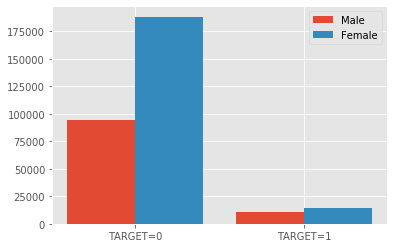

In [12]:
# 目的変数と性別の関係を調べる
df_trg0_male = len(df[df['CODE_GENDER']=='M'][df['TARGET']==0])
df_trg0_female = len(df[df['CODE_GENDER']=='F'][df['TARGET']==0])
df_trg1_male = len(df[df['CODE_GENDER']=='M'][df['TARGET']==1])
df_trg1_female = len(df[df['CODE_GENDER']=='F'][df['TARGET']==1])

# データセットの作成
x = [1, 1.5]
y1, y2 = [df_trg0_male, df_trg1_male], [df_trg0_female, df_trg1_female]

# 複数グループの棒グラフの描画
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

w = 0.2
ax.bar(x, y1, width=w, label='Male')
ax.bar(np.array(x) + w, y2, width=w, label='Female')
ax.set_xticks([1.1, 1.6])
ax.set_xticklabels(['TARGET=0', 'TARGET=1'])
ax.legend()
plt.show()

返済に遅れがない人(TARGET=0)、遅れがある人(TARGET=1)のどちらも女性が多いことが分かった  
次に、目的変数(TARGET)に対する男女比を調べる

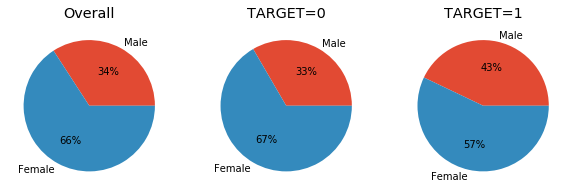

In [13]:
fig = plt.figure(figsize=(10,5))
plt.style.use('ggplot')
labels = ['Male', 'Female']

sizes0 = [df_trg0_male+df_trg1_male, df_trg0_female+df_trg1_female]
ax0 = fig.add_subplot(1, 3, 1)
ax0.pie(sizes0, labels=labels, autopct='%1.0f%%')
ax0.set_title('Overall')

sizes1 = [df_trg0_male, df_trg0_female]
ax1 = fig.add_subplot(1, 3, 2)
ax1.pie(sizes1, labels=labels, autopct='%1.0f%%')
ax1.set_title('TARGET=0')

sizes2 = [df_trg1_male, df_trg1_female]
ax2 = fig.add_subplot(1, 3, 3)
ax2.pie(sizes2, labels=labels, autopct='%1.0f%%')
ax2.set_title('TARGET=1')

plt.show()

上図より、  
返済が遅れていない人(TARGET=0)の男女比率は全体的な男女比率とほとんど変わらないが、  
返済が遅れている人(TARGET=1)の男女比率は男性の方が若干比率が高いことが分かる。

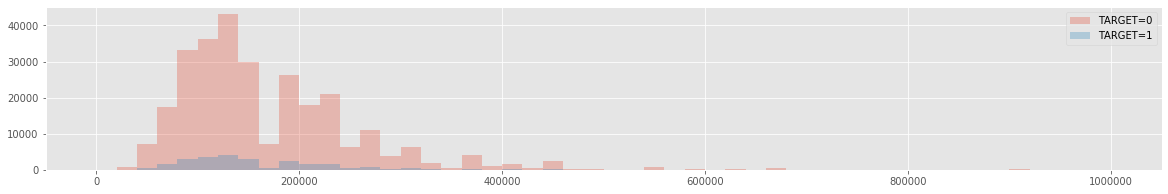

In [14]:
fig = plt.figure(figsize=(20,3))

hist_trg0_income = df['AMT_INCOME_TOTAL'][df['TARGET']==0]
hist_trg1_income = df['AMT_INCOME_TOTAL'][df['TARGET']==1]

ax = fig.add_subplot(1, 1, 1)
ax.hist(hist_trg0_income, bins=50, alpha=0.3, range=(0, 1000000), label='TARGET=0')
ax.hist(hist_trg1_income, bins=50, alpha=0.3, range=(0, 1000000), label='TARGET=1')
plt.legend()
plt.show()

目的変数と年収の分布をプロットした。
上図だと、TARGET=0とTARGET=1の場合で年収との分布の差が分かりにくいため、正規化する。

C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


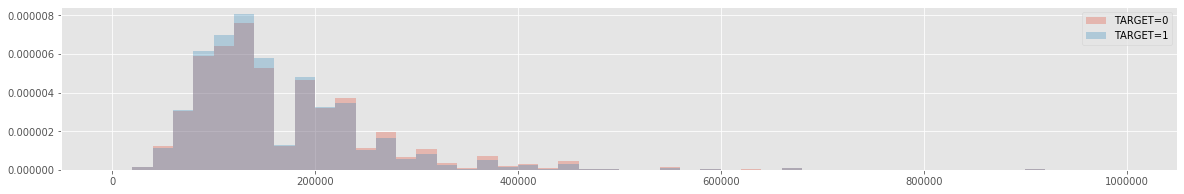

In [15]:
fig = plt.figure(figsize=(20,3))

hist_trg0_income = df['AMT_INCOME_TOTAL'][df['TARGET']==0]
hist_trg1_income = df['AMT_INCOME_TOTAL'][df['TARGET']==1]

ax = fig.add_subplot(1, 1, 1)
ax.hist(hist_trg0_income, bins=50, alpha=0.3, normed=True, range=(0, 1000000), label='TARGET=0')
ax.hist(hist_trg1_income, bins=50, alpha=0.3, normed=True, range=(0, 1000000), label='TARGET=1')
plt.legend()
plt.show()

正規化した結果、TARGET=0とTARGET=1で年収の分布の差がほとんどないことが分かった。
よって、年収の大小は返済遅れのありなしには関係がなさそうということが分かった。

In [16]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

収入タイプとして、'Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'の8種が記載されていることが分かる。

C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\ajbad\Anaconda3\lib\site-packages

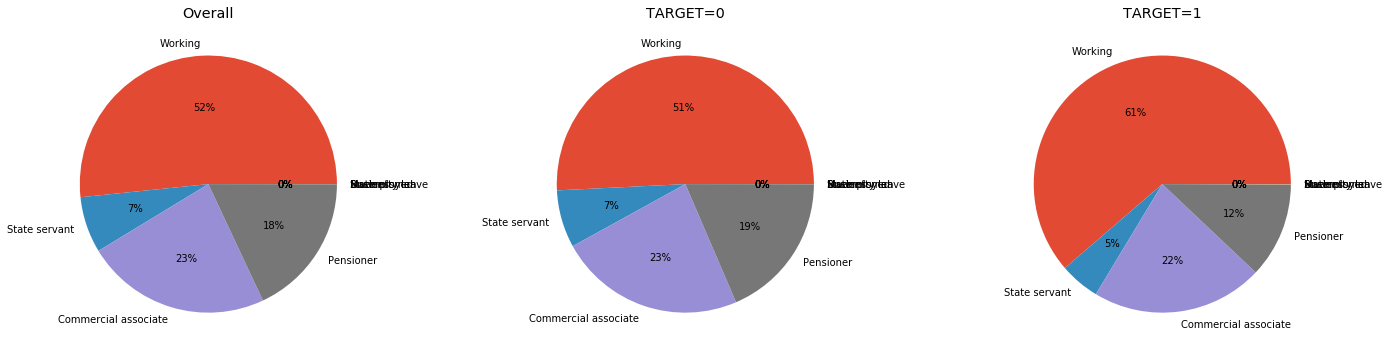

In [17]:
fig = plt.figure(figsize=(20,5))
plt.style.use('ggplot')

df_trg0_working = len(df[df['NAME_INCOME_TYPE']=='Working'][df['TARGET']==0])
df_trg0_state_servant = len(df[df['NAME_INCOME_TYPE']=='State servant'][df['TARGET']==0])
df_trg0_commercial_associate = len(df[df['NAME_INCOME_TYPE']=='Commercial associate'][df['TARGET']==0])
df_trg0_pensioner = len(df[df['NAME_INCOME_TYPE']=='Pensioner'][df['TARGET']==0])
df_trg0_unemployed = len(df[df['NAME_INCOME_TYPE']=='Unemployed'][df['TARGET']==0])
df_trg0_student = len(df[df['NAME_INCOME_TYPE']=='Student'][df['TARGET']==0])
df_trg0_businessman = len(df[df['NAME_INCOME_TYPE']=='Businessman'][df['TARGET']==0])
df_trg0_maternity_leave = len(df[df['NAME_INCOME_TYPE']=='Maternity leave'][df['TARGET']==0])

df_trg1_working = len(df[df['NAME_INCOME_TYPE']=='Working'][df['TARGET']==1])
df_trg1_state_servant = len(df[df['NAME_INCOME_TYPE']=='State servant'][df['TARGET']==1])
df_trg1_commercial_associate = len(df[df['NAME_INCOME_TYPE']=='Commercial associate'][df['TARGET']==1])
df_trg1_pensioner = len(df[df['NAME_INCOME_TYPE']=='Pensioner'][df['TARGET']==1])
df_trg1_unemployed = len(df[df['NAME_INCOME_TYPE']=='Unemployed'][df['TARGET']==1])
df_trg1_student = len(df[df['NAME_INCOME_TYPE']=='Student'][df['TARGET']==1])
df_trg1_businessman = len(df[df['NAME_INCOME_TYPE']=='Businessman'][df['TARGET']==1])
df_trg1_maternity_leave = len(df[df['NAME_INCOME_TYPE']=='Maternity leave'][df['TARGET']==1])

labels = ['Working', 'State servant', 'Commercial associate', 'Pensioner',
          'Unemployed', 'Student', 'Businessman', 'Maternity leave']

sizes0 = [df_trg0_working+df_trg1_working, df_trg0_state_servant+df_trg1_state_servant,
          df_trg0_commercial_associate+df_trg1_commercial_associate, df_trg0_pensioner+df_trg1_pensioner,
          df_trg0_unemployed+df_trg1_unemployed, df_trg0_student+df_trg1_student,
          df_trg0_businessman+df_trg1_businessman, df_trg0_maternity_leave+df_trg1_maternity_leave]
ax0 = fig.add_subplot(1, 3, 1)
ax0.pie(sizes0, labels=labels, autopct='%1.0f%%')
ax0.set_title('Overall')

sizes1 = [df_trg0_working, df_trg0_state_servant, df_trg0_commercial_associate, df_trg0_pensioner,
          df_trg0_unemployed, df_trg0_student, df_trg0_businessman, df_trg0_maternity_leave]
ax1 = fig.add_subplot(1, 3, 2)
ax1.pie(sizes1, labels=labels, autopct='%1.0f%%')
ax1.set_title('TARGET=0')

sizes2 = [df_trg1_working, df_trg1_state_servant, df_trg1_commercial_associate, df_trg1_pensioner,
          df_trg1_unemployed, df_trg1_student, df_trg1_businessman, df_trg1_maternity_leave]
ax2 = fig.add_subplot(1, 3, 3)
ax2.pie(sizes2, labels=labels, autopct='%1.0f%%')
ax2.set_title('TARGET=1')

plt.tight_layout()
plt.show()

上図より、  
返済が遅れていない人(TARGET=0)の比率は全体的な男女比率とほとんど変わらないが、  
返済が遅れている人(TARGET=1)の比率は'Working'の方が若干比率が高く、'State servant', 'Pensioner'が若干低いことが分かる。